In [4]:
import os
import numpy as np

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [5]:
num_threads = 5
os.environ["OMP_NUM_THREADS"] = "5"
os.environ["TF_NUM_INTRAOP_THREADS"] = "5"
os.environ["TF_NUM_INTEROP_THREADS"] = "5"
tf.config.threading.set_inter_op_parallelism_threads(num_threads)
tf.config.threading.set_intra_op_parallelism_threads(num_threads)
tf.config.set_soft_device_placement(True)

In [7]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

In [8]:
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']

6  9  9  4  1  1  2  7  8  3  4  7  7  2  9  9  9  3  
2  6  4  3  6  6  2  6  3  5  4  0  0  9  1  3  4  0  


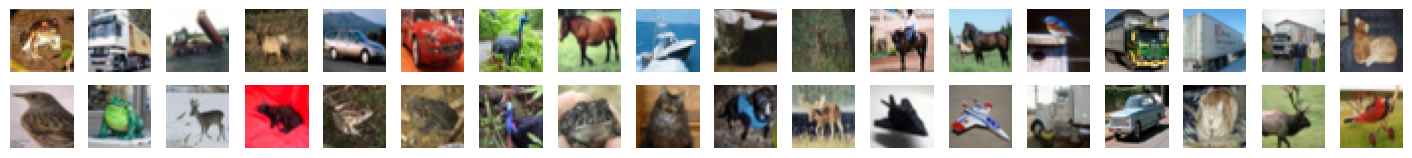

In [74]:
plt.figure(figsize=(18, 1.8))
 
num_rows = 2
num_cols = 18
 
for i in range(num_rows*num_cols):
    ax = plt.subplot(num_rows, num_cols, i + 1)
    plt.imshow(train_images[i,:,:])
    plt.axis("off")

labels = ''
for i in range(num_rows*num_cols):
    labels += str(train_labels[i][0]) + '  '
    if i == num_cols-1:
        labels += '\n'

print(labels)        

In [76]:
train_labels.shape

(50000, 1)

In [58]:
train_images.shape

(50000, 32, 32, 3)

In [57]:
print('top-left pixel of first imaage', train_images[0][0][0])
print('top-left pixel of third imaage', train_images[2][0][0])

top-left pixel of first imaage [0.23137255 0.24313725 0.24705882]
top-left pixel of third imaage [1. 1. 1.]


In [93]:
test_images.shape

(10000, 32, 32, 3)

In [85]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())

model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 15, 15, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_28 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_19 (MaxPooli  (None, 6, 6, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_29 (Conv2D)          (None, 4, 4, 64)          36928     
                                                                 
 flatten_6 (Flatten)         (None, 1024)             

In [87]:
model.compile(optimizer='adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [89]:
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
  10/1563 [..............................] - ETA: 20s - loss: 0.9753 - accuracy: 0.6469

2023-09-23 11:12:51.077507: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 614400000 exceeds 10% of free system memory.


1563/1563 [==============================] - 21s 13ms/step - loss: 0.9857 - accuracy: 0.6532 - val_loss: 0.9759 - val_accuracy: 0.6596
Epoch 2/10
1563/1563 [==============================] - 21s 14ms/step - loss: 0.8829 - accuracy: 0.6882 - val_loss: 0.9329 - val_accuracy: 0.6749
Epoch 3/10
1563/1563 [==============================] - 21s 13ms/step - loss: 0.8095 - accuracy: 0.7174 - val_loss: 0.9291 - val_accuracy: 0.6736
Epoch 4/10
1563/1563 [==============================] - 21s 13ms/step - loss: 0.7509 - accuracy: 0.7353 - val_loss: 0.9615 - val_accuracy: 0.6719
Epoch 5/10
1563/1563 [==============================] - 21s 14ms/step - loss: 0.6971 - accuracy: 0.7567 - val_loss: 0.8342 - val_accuracy: 0.7126
Epoch 6/10
1563/1563 [==============================] - 21s 14ms/step - loss: 0.6555 - accuracy: 0.7684 - val_loss: 0.8308 - val_accuracy: 0.7138
Epoch 7/10
1563/1563 [==============================] - 21s 14ms/step - loss: 0.6155 - accuracy: 0.7854 - val_loss: 0.8202 - val_accura

In [90]:
est_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(test_acc)

313/313 - 1s - loss: 0.9239 - accuracy: 0.7039 - 1s/epoch - 3ms/step
0.7038999795913696


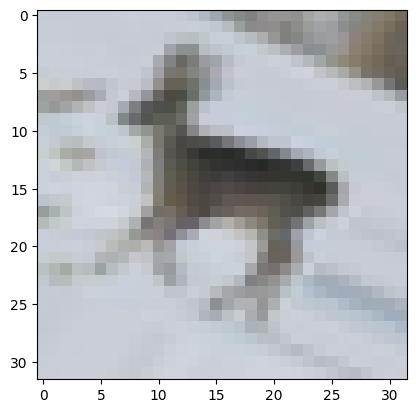

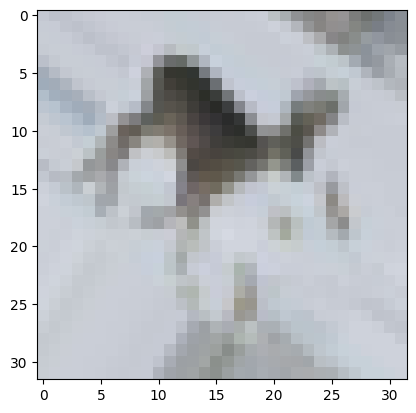

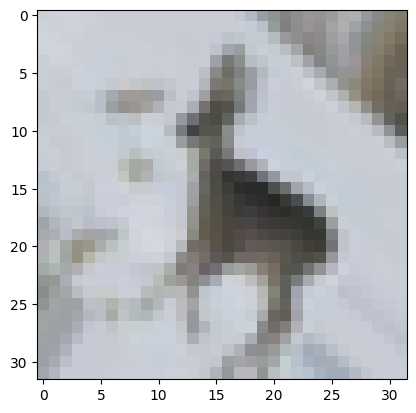

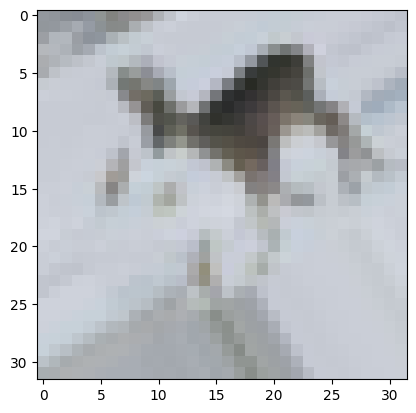

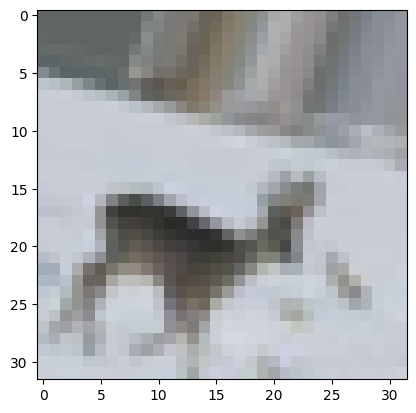

In [92]:
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')


test_img = train_images[20]
img = image.img_to_array(test_img) 
img = img.reshape((1,) + img.shape) 

i = 0
for batch in datagen.flow(img, save_prefix='test', save_format='jpeg'): 
    plt.figure(i)
    plot = plt.imshow(image.img_to_array(batch[0]))
    i += 1
    if i > 4: # show 4 images
        break
plt.show()